In [1]:
import pdb

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import astropy
from astropy import stats as astrostats
import radvel
%matplotlib inline

# Assuming a polished list of known planets and candidates in the legacy sample, explore and visualize properties such as mass, host star metallicity, etc.

In [4]:
data = pd.read_csv('system_props_third_descriptions.csv')

In [6]:
specmatch = pd.read_csv('/Users/lee/Academics/Astronomy/Planets/legacy_analysis/legacy_tables/legacy_specmatch_vsini20_medians.csv')

In [7]:
len(specmatch)

581

In [8]:
#masses_only = pd.read_csv('planet_candidates/planet_list.csv') 
masses_only = pd.read_csv('planet_list_es.csv') # With eccentricities

## Filter out the 'N's to see if I cut out any Super-Earths by accident.

In [9]:
masses_out = masses_only.loc[masses_only.status == 'N'].reset_index(drop=True)

In [10]:
masses_out_earth = masses_out.loc[masses_out.mass <= 1].reset_index(drop=True)
masses_out_earth = masses_out_earth.loc[masses_out_earth.per <= 10**4].reset_index(drop=True)

In [11]:
masses_out_earth

,Unnamed: 0,hostname,mass,a,per,e,status
0,15,9986,0.897928,4.308462,3223.379932,0.137890,N
1,18,4747,0.552124,4.526017,3871.662714,0.392361,N
2,19,4747,0.052486,0.137058,20.402443,0.520291,N
3,25,3651,0.125318,5.357923,4794.999015,0.309205,N
4,30,9407,0.022636,0.609030,179.556048,0.345089,N
5,31,10476,0.056971,0.928119,356.826319,0.605450,N
6,33,10700,0.021260,0.565341,182.668297,0.456893,N
7,36,11964a,0.251620,0.055881,4.664632,0.990000,N
8,37,11964a,0.009189,0.047508,3.656642,0.883740,N
9,38,12051,0.036035,1.088566,420.575760,0.367154,N


In [12]:
masses_real = masses_only.loc[masses_only.status != 'N'].reset_index(drop=True)
masses_real = masses_real.loc[masses_real.status != 'B'].reset_index(drop=True) # Drop binaries
masses_good = masses_real.loc[masses_real.mass != np.nan].reset_index(drop=True)#[masses_only.hostname != 'hip63510']
#masses_good = masses_good.loc[masses_real.mass <= 20].reset_index(drop=True) #Missed some companions, COME BACK TO THIS
masses_old = masses_good.loc[masses_good.status == 'K'].reset_index(drop=True)#.reset_index()
masses_new = masses_good.loc[masses_good.status == 'C'].reset_index(drop=True)#.reset_index()

In [13]:
print(len(masses_old), len(masses_new))

151 38


In [14]:
masses_new.sort_values('a')

,Unnamed: 0,hostname,mass,a,per,e,status
0,23,1326,0.024326,0.083900,11.442850,0.025942,C
14,116,95735,0.011373,0.090391,12.939183,0.051942,C
31,295,168009,0.030949,0.119558,15.144793,0.106486,C
26,264,141004,0.040449,0.123585,15.507886,0.164296,C
37,358,86728,0.034560,0.200239,31.113565,0.412962,C
34,320,201092,0.020834,0.220208,49.044000,0.201008,C
17,120,97101,0.032864,0.237348,51.625950,0.241665,C
36,349,55575,0.042698,0.237481,45.744401,0.135900,C
1,28,1461,0.035371,0.348904,72.926022,0.339952,C
25,223,190360,0.034478,0.393157,88.688686,0.086763,C


In [17]:
masses_good.loc[masses_good.hostname == '164922']

,Unnamed: 0,hostname,mass,a,per,e,status
89,181,164922,0.363110,2.168801,1213.610937,0.101409,K
90,182,164922,0.048227,0.341248,75.745211,0.089673,K


In [12]:
masses_good.query('per > 2*10**4')

,Unnamed: 0,hostname,mass,a,per,e,status
28,64,34721,1.311420,20.954098,34547.53489,0.370596,C
84,167,145675,6.182651,16.287629,24043.75217,0.440123,C
93,188,168443,7.570051,16.446298,23702.32991,0.284218,C
140,277,149806,4.622411,14.407135,20483.40127,0.306224,C
164,336,32923,2.264484,15.722908,23496.03713,0.141967,C
184,365,95128,1.349735,18.034964,27574.80370,0.618362,K


In [13]:
masses_new

,Unnamed: 0,hostname,mass,a,per,e,status
0,23,1326,0.024326,0.083900,11.442850,0.025942,C
1,28,1461,0.035371,0.348904,72.926022,0.339952,C
2,29,9407,0.030044,0.470163,121.790605,0.223363,C
3,50,24040,2.810548,9.594095,10206.218390,0.522201,C
4,51,24040,0.202252,1.309665,514.753108,0.116924,C
5,64,34721,1.311420,20.954098,34547.534890,0.370596,C
6,80,50499,3.115046,9.262364,9006.397047,0.209828,C
7,84,52265,0.333921,2.611045,1381.228371,0.615945,C
8,86,63754,2.741236,10.982975,11396.758580,0.430841,C
9,91,66428,2.119574,7.948874,7802.471657,0.223872,C


In [14]:
masses_new.sort_values('a')

,Unnamed: 0,hostname,mass,a,per,e,status
0,23,1326,0.024326,0.083900,11.442850,0.025942,C
14,116,95735,0.011373,0.090391,12.939183,0.051942,C
31,295,168009,0.030949,0.119558,15.144793,0.106486,C
26,264,141004,0.040449,0.123585,15.507886,0.164296,C
37,358,86728,0.034560,0.200239,31.113565,0.412962,C
34,320,201092,0.020834,0.220208,49.044000,0.201008,C
17,120,97101,0.032864,0.237348,51.625950,0.241665,C
36,349,55575,0.042698,0.237481,45.744401,0.135900,C
1,28,1461,0.035371,0.348904,72.926022,0.339952,C
25,223,190360,0.034478,0.393157,88.688686,0.086763,C


In [15]:
mass = masses_good.mass
mold = masses_old.mass
aold = masses_old.a
a    = masses_good.a
perold = masses_old.per
per    = masses_good.per

## Look at all good Super-Earth candidates.

In [16]:
super_earths = masses_new.query('a < 5 and mass < 1')

In [17]:
print(len(super_earths))
super_earths.sort_values('per')

17


,Unnamed: 0,hostname,mass,a,per,e,status
0,23,1326,0.024326,0.083900,11.442850,0.025942,C
14,116,95735,0.011373,0.090391,12.939183,0.051942,C
31,295,168009,0.030949,0.119558,15.144793,0.106486,C
26,264,141004,0.040449,0.123585,15.507886,0.164296,C
37,358,86728,0.034560,0.200239,31.113565,0.412962,C
36,349,55575,0.042698,0.237481,45.744401,0.135900,C
34,320,201092,0.020834,0.220208,49.044000,0.201008,C
17,120,97101,0.032864,0.237348,51.625950,0.241665,C
1,28,1461,0.035371,0.348904,72.926022,0.339952,C
25,223,190360,0.034478,0.393157,88.688686,0.086763,C


In [18]:
giants = masses_new.query('not(a < 5 and mass < 1)')

In [19]:
giants.sort_values('per')

,Unnamed: 0,hostname,mass,a,per,e,status
22,161,136925,1.133685,5.007001,4399.182791,0.756885,C
20,140,114174,0.948845,6.578989,6225.359292,0.034447,C
9,91,66428,2.119574,7.948874,7802.471657,0.223872,C
12,111,92788,2.903265,8.471980,8539.472576,0.373180,C
32,298,17230,1.052834,7.354847,8681.852317,0.123726,C
6,80,50499,3.115046,9.262364,9006.397047,0.209828,C
21,146,120066,2.957645,9.064027,9523.691892,0.717822,C
10,94,68988,11.073244,9.732305,10027.566620,0.348177,C
3,50,24040,2.810548,9.594095,10206.218390,0.522201,C
19,136,111031,7.503714,9.638037,10213.718710,0.270210,C


## Pull Specmatch metallicities into planet properties. In 'Masses_good_with_specmatch'.

In [20]:
masses_good.columns

Index(['Unnamed: 0', 'hostname', 'mass', 'a', 'per', 'e', 'status'], dtype='object')

In [21]:
specmatch.columns

Index(['name', 'teff', 'teff_err', 'logg', 'logg_err', 'fe', 'fe_err', 'vsini',
       'iso_mass', 'iso_mass_err1', 'iso_mass_err2', 'iso_radius',
       'iso_radius_err1', 'iso_radius_err2', 'iso_logage', 'iso_logage_err1',
       'iso_logage_err2', 'iso_age_err1', 'iso_age_err2', 'iso_teff',
       'iso_teff_err1', 'iso_teff_err2', 'iso_logg', 'iso_logg_err1',
       'iso_logg_err2', 'iso_fe', 'iso_fe_err1', 'iso_fe_err2', 'teff_emp',
       'teff_err_emp', 'fe_emp', 'fe_err_emp'],
      dtype='object')

In [22]:
merge_columns = list(masses_good.columns)
merge_columns.append('fe')
m_good_spec = pd.DataFrame(columns=merge_columns)
'''
for i in np.arange(len(masses_good)):
    name = masses_good.hostname[i]
    #this_planet = masses_good.loc[masses_good.hostname == name]
    this_planet = masses_good.loc[i].to_dict()
    #pdb.set_trace()
    this_specmatch = specmatch.loc[specmatch.name == name]
    row = {}
    #for key in this_planet.columns:
    for key in list(masses_good.columns):
        row[key] = this_planet[key]#.values[0]
    row['fe'] = this_specmatch['fe']#.values[0]
    pdb.set_trace()
    for key in merge_columns:
        m_good_spec.loc[i, key] = 5#row[key]
'''    
masses_good['name'] = masses_good['hostname']
m_good_spec = pd.merge(masses_good, specmatch, on=['name'])#,suffixes=['_syn','_emp'])

In [23]:
len(m_good_spec)

171

## Filter out planet candidates beyond 2 AU and above 0.1 M_Jup, and stars with measured metallicity < -0.6 (bad measurement).

In [24]:
good_spec_filter = m_good_spec.query('a < 5 and mass > 0.05')#('fe > -0.6 and a < 5 and mass > 0.1')
print(len(m_good_spec), len(good_spec_filter))
good_spec_filter.sort_values('mass')

171 126


,Unnamed: 0,hostname,mass,a,per,e,status,name,teff,teff_err,...,iso_logg,iso_logg_err1,iso_logg_err2,iso_fe,iso_fe_err1,iso_fe_err2,teff_emp,teff_err_emp,fe_emp,fe_err_emp
98,222,190360,0.072545,0.131302,17.116859,0.171992,K,190360,5553.933328,100.0,...,4.170496,0.098085,-0.096468,0.237129,0.060770,-0.061936,5490.0,110.0,0.295,0.09
15,35,11964a,0.079463,0.225933,37.922329,0.120769,K,11964a,5330.855554,100.0,...,3.918717,0.080593,-0.086590,0.131182,0.060706,-0.062305,5167.5,110.0,0.195,0.09
56,126,99492,0.080971,0.123386,17.055194,0.104324,K,99492,4957.220747,100.0,...,4.523733,0.038209,-0.037835,0.286521,0.059737,-0.062591,4826.0,110.0,0.160,0.09
122,271,143761,0.082599,0.413868,102.560374,0.090903,K,143761,5733.485820,100.0,...,4.181263,0.114156,-0.105672,-0.198212,0.059547,-0.058461,5666.0,110.0,-0.300,0.09
136,300,179079,0.084850,0.123271,14.484804,0.111819,K,179079,5647.859557,100.0,...,3.977547,0.098970,-0.091573,0.257726,0.063247,-0.058492,5651.0,110.0,0.310,0.09
152,345,47186,0.085023,0.051010,4.084803,0.052222,K,47186,5661.094964,100.0,...,4.262210,0.096473,-0.092671,0.250591,0.061332,-0.061383,5630.5,110.0,0.310,0.09
141,313,192310,0.085516,2.611903,1687.065638,0.587509,NaN,192310,5095.847455,100.0,...,4.535437,0.037807,-0.040259,0.058496,0.062687,-0.059462,5034.0,110.0,0.065,0.09
130,282,156668,0.107170,1.545161,799.981825,0.103872,C,156668,4801.722334,100.0,...,4.576985,0.026693,-0.027267,0.026225,0.061513,-0.060838,4720.0,110.0,0.020,0.09
33,78,49674,0.114922,0.058060,4.947157,0.064286,K,49674,5650.989671,100.0,...,4.379042,0.068767,-0.089878,0.301616,0.061056,-0.061520,5484.0,110.0,0.320,0.09
89,198,177830,0.145535,0.508607,111.045321,0.402834,K,177830,4864.205060,100.0,...,3.391299,0.093614,-0.096355,0.353777,0.056598,-0.057629,4997.5,110.0,0.380,0.09


In [25]:
high_e = good_spec_filter.query('e > 0.5')
print(len(high_e))
print(high_e[['hostname', 'mass', 'a', 'per', 'e', 'fe', 'status']])

18
    hostname      mass         a          per         e        fe status
3       4203  1.889730  1.200852   437.146948  0.518092  0.410038      K
8       3651  0.224366  0.295932    62.241643  0.612965  0.190827      K
31     45350  1.795820  1.974732   977.605687  0.784780  0.311165      K
38     52265  0.333921  2.611045  1381.228371  0.615945  0.218043      C
46     74156  1.717411  0.283704    51.631767  0.659263  0.092625      K
67    126614  0.380247  2.396454  1253.250664  0.565031  0.451904      K
80    168443  7.986552  0.299030    58.111421  0.530989  0.095784      K
107   222582  7.895704  1.338107   572.571259  0.758159  0.034619      K
124   148164  1.248842  1.007712   329.380632  0.593669  0.200264      K
129   156279  9.907381  0.502751   132.886374  0.703301  0.216864      K
138   186427  1.757767  1.680626   800.909072  0.680295  0.089671      K
139   190228  3.942928  2.136060  1139.051875  0.574996 -0.207615      K
141   192310  0.085516  2.611903  1687.065638  0

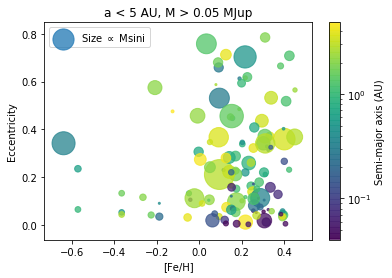

In [26]:
fig, ax = plt.subplots()
#plt.title('Eccentricity vs. Metallicity ([Fe/H] > -0.6)')
plt.title('a < 5 AU, M > 0.05 MJup')
im = ax.scatter(good_spec_filter.fe, good_spec_filter.e, s=list(50*good_spec_filter.mass), 
                c=good_spec_filter.a, norm=matplotlib.colors.LogNorm(), alpha=0.75, label=r'Size $\propto$ Msini')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('Eccentricity')
#ax.set_xlim([-0.3, 0.5])
ax.legend(loc=0)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Semi-major axis (AU)')#, rotation=270)
fig.savefig('planet_candidates/fe_eccentricity_m05.pdf')

## Look at low-metallicity host stars.

In [27]:
good_spec_filter.query('fe < -0.1')[['hostname', 'per', 'mass', 'iso_mass', 
                                     'teff_emp', 'fe', 'fe_emp', 'e']]

,hostname,per,mass,iso_mass,teff_emp,fe,fe_emp,e
0,37124,154.222416,0.639256,0.780924,5570.5,-0.364363,-0.585,0.053035
1,37124,887.735354,0.661283,0.780924,5570.5,-0.364363,-0.585,0.133024
2,37124,1770.215790,0.656352,0.780924,5570.5,-0.364363,-0.585,0.044078
5,4208,833.578380,0.782832,0.842869,5611.5,-0.225524,-0.375,0.042038
64,114729,1134.433993,0.858416,0.894370,5713.0,-0.264187,-0.325,0.116157
103,216520,4480.581347,0.172599,0.777563,5078.0,-0.124592,-0.170,0.475563
111,114762,83.920007,10.631038,0.781896,6010.0,-0.638020,-0.490,0.342160
121,143761,39.849710,1.048747,0.899128,5666.0,-0.187012,-0.300,0.035336
122,143761,102.560374,0.082599,0.899128,5666.0,-0.187012,-0.300,0.090903
127,155358,194.670445,0.877505,0.800412,5979.0,-0.570417,-0.490,0.235477


## Overplot total sample histogram in metallicity, and eccentricity/metallicity scatterplot for planets.

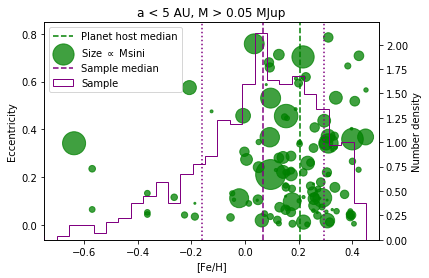

In [28]:
fig, ax = plt.subplots()
#plt.title('Eccentricity vs. Metallicity ([Fe/H] > -0.6)')
plt.title('a < 5 AU, M > 0.05 MJup')
ln1 = ax.scatter(good_spec_filter.fe, good_spec_filter.e, s=list(50*good_spec_filter.mass), 
                alpha=0.75, c='g', label=r'Size $\propto$ Msini')

#Accurately calculate median for planet hosts, don't duplicate metallicity for each planet.
unique_fe = np.unique(good_spec_filter.fe)
median_fe = np.median(unique_fe)
#mad_fe = astrostats.median_absolute_deviation(unique_fe)
mad_fe = astrostats.mad_std(unique_fe)

ln2 = ax.axvline(x=median_fe, c='green', ls='--', label='Planet host median')
#ax.axvline(x=median_fe+mad_fe, c='purple', ls='--')
#ax.axvline(x=median_fe-mad_fe, c='purple', ls='--')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('Eccentricity')
ax.set_xlim([-0.75, 0.5])

ax2 = ax.twinx()
ln3 = ax2.hist(specmatch.fe, bins=50, histtype='step', color='purple', density=True, label='Sample')
median_sample_fe = np.median(specmatch.fe)
#mad_sample_fe = astrostats.median_absolute_deviation(specmatch.fe)
mad_sample_fe = astrostats.mad_std(specmatch.fe)
ln4 = ax2.axvline(x=median_sample_fe, c='purple', ls='--', label='Sample median')
ax.axvline(x=median_sample_fe+mad_sample_fe, c='purple', ls=':')
ax.axvline(x=median_sample_fe-mad_sample_fe, c='purple', ls=':')
ax2.set_ylabel('Number density')
#ax2.set_xlim([-0.75, 0.5])

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

fig.savefig('planet_candidates/fe_eccentricity_hist.pdf')

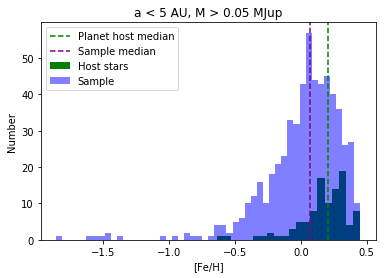

In [29]:
fig, ax = plt.subplots()
plt.title('a < 5 AU, M > 0.05 MJup')
#ln1 = ax.scatter(good_spec_filter.fe, good_spec_filter.e, s=list(50*good_spec_filter.mass), 
#                alpha=0.75, c='g', label=r'Size $\propto$ Msini')

# Accurately calculate median for planet hosts, don't duplicate metallicity for each planet.
unique_fe = np.unique(good_spec_filter.fe)
median_fe = np.median(unique_fe)
#mad_fe = astrostats.median_absolute_deviation(unique_fe)
mad_fe = astrostats.mad_std(unique_fe)

ln1 = ax.hist(unique_fe, bins=20, histtype='stepfilled', color='green', 
              alpha=1, density=False, label='Host stars')
ln2 = ax.axvline(x=median_fe, c='green', ls='--', label='Planet host median')
#ax.axvline(x=median_fe+mad_fe, c='purple', ls='--')
#ax.axvline(x=median_fe-mad_fe, c='purple', ls='--')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('Number')
#ax.set_xlim([-0.75, 0.5])

#ax2 = ax.twinx()
ln3 = ax.hist(specmatch.fe, bins=50, histtype='stepfilled', color='blue', 
               alpha=0.5, density=False, label='Sample')
median_sample_fe = np.median(specmatch.fe)
#mad_sample_fe = astrostats.median_absolute_deviation(specmatch.fe)
mad_sample_fe = astrostats.mad_std(specmatch.fe)
ln4 = ax.axvline(x=median_sample_fe, c='purple', ls='--', label='Sample median')
#ax.axvline(x=median_sample_fe+mad_sample_fe, c='purple', ls=':')
#ax.axvline(x=median_sample_fe-mad_sample_fe, c='purple', ls=':')
#ax2.set_ylabel('Number density')
#ax2.set_xlim([-0.75, 0.5])

lines, labels = ax.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend()
#ax.legend(lines + lines2, labels + labels2, loc=0)

fig.savefig('planet_candidates/fe_two_hist_num.pdf')

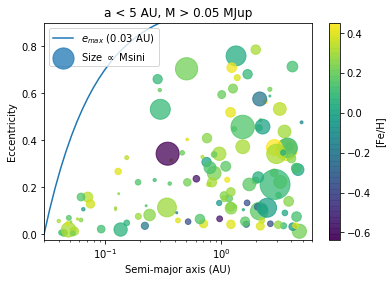

In [30]:
# Overplot peri-distance limit 0.03 AU.
axes = np.logspace(np.log10(0.03), np.log10(6))
e_max = 1 - 0.03/axes

fig, ax = plt.subplots()
plt.title('a < 5 AU, M > 0.05 MJup')
im = ax.scatter(good_spec_filter.a, good_spec_filter.e, s=list(50*good_spec_filter.mass), 
                c=good_spec_filter.fe, alpha=0.75, label=r'Size $\propto$ Msini')
ax.plot(axes, e_max, label=r'$e_{max}$ (0.03 AU)')
ax.set_xlabel('Semi-major axis (AU)')
ax.set_ylabel('Eccentricity')
ax.set_xlim([0.03,6])
ax.set_ylim([-0.025,0.9])
ax.set_xscale('log')
ax.legend(loc=2)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('[Fe/H]')#, rotation=270)
fig.savefig('planet_candidates/axis_eccentricity_log_lim.pdf')

## Estimate mass/semi-major-axis correlation.

Text(0, 0.5, 'Msini (MJup)')

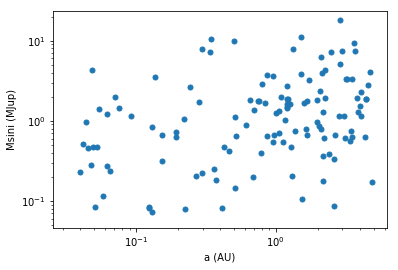

In [31]:
fig, ax = plt.subplots()
ax.scatter(good_spec_filter.a, good_spec_filter.mass)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('a (AU)')
ax.set_ylabel('Msini (MJup)')

## Make a bunch of histograms.

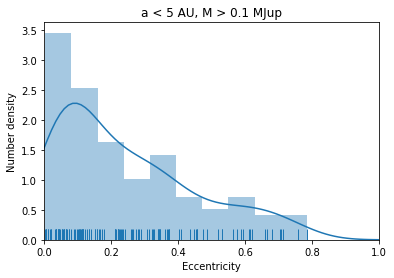

In [33]:
ax = sns.distplot(good_spec_filter.e, bins=10, rug=True)
ax.set(xlabel='Eccentricity', ylabel='Number density')
ax.set_title('a < 5 AU, M > 0.1 MJup')
ax.set_xlim([0,1])
fig = ax.get_figure()
fig.savefig('planet_candidates/eccentricity_histogram_05.pdf')

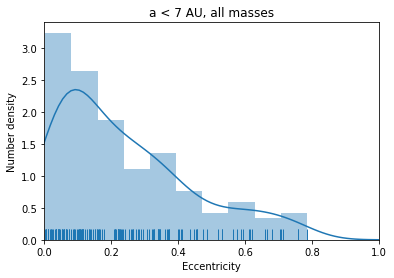

In [35]:
good_spec_all_mass = m_good_spec.query('a < 7')

ax = sns.distplot(good_spec_all_mass.e, bins=10, rug=True)
#ax.barplot()
ax.set(xlabel='Eccentricity', ylabel='Number density')
ax.set_title('a < 7 AU, all masses')
ax.set_xlim([0,1])
fig = ax.get_figure()
fig.savefig('planet_candidates/eccentricity_histogram_all_masses.pdf')

ValueError: cannot convert float NaN to integer

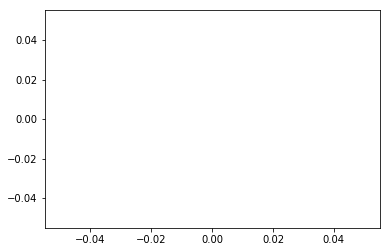

In [34]:
ax = sns.distplot(np.log10(mass), rug=True)
ax.set(xlabel='log10(Msini/MJup)', ylabel='Number density')
ax.set_title('Including new candidates')
fig = ax.get_figure()
fig.savefig('planet_candidates/new_histogram.pdf')

In [ ]:
axold = sns.distplot(np.log10(mold), rug=True)
axold.set(xlabel='log10(Msini/MJup)', ylabel='Number density')
axold.set_title('Known planets')
fig = axold.get_figure()
fig.savefig('planet_candidates/known_histogram.pdf')

In [ ]:
masses_close = masses_good.loc[masses_good.a < 1]
masses_mid   = masses_good.loc[np.logical_and(masses_good.a >= 1, masses_good.a <= 3)]
masses_far   = masses_good.loc[masses_good.a > 3]

In [ ]:
mclose = masses_close.mass
thresh_close = np.log10(0.075) #50% completeness threshold

axclose = sns.distplot(np.log10(mclose), rug=True)
axclose.axvline(thresh_close, c='g', label='Bryan 16 50% completeness')
axclose.set(xlabel='log10(Msini/MJup)', ylabel='Number density')
axclose.set_title('a < 1 AU')
axclose.legend()

figclose = axclose.get_figure()
figclose.savefig('planet_candidates/close_histogram.pdf')

In [ ]:
mmid = masses_mid.mass
thresh_mid = np.log10(0.15) #50% completeness threshold

axmid = sns.distplot(np.log10(mmid), rug=True)
axmid.axvline(thresh_mid, c='g', label='Bryan 16 50% completeness')
axmid.set(xlabel='log10(Msini/MJup)', ylabel='Number density')
axmid.set_title('1 AU < a < 3 AU')
axmid.legend()

figmid = axmid.get_figure()
figmid.savefig('planet_candidates/middle_histogram.pdf')

In [ ]:
mfar = masses_far.mass
thresh_far = np.log10(1.2) #50% completeness threshold

axfar = sns.distplot(np.log10(mfar), rug=True)
axfar.axvline(thresh_far, c='g', label='Bryan 16 50% completeness')
axfar.set(xlabel='log10(Msini/MJup)', ylabel='Number density')
axfar.set_title('a > 3 AU')
axfar.legend()

figfar = axfar.get_figure()
figfar.savefig('planet_candidates/far_histogram.pdf')

## Make distributions of periods and period ratios.

In [ ]:
# Only use ratios below 20.
axper = sns.distplot(np.log10(masses_good.per), rug=True)
axper.set(xlabel='log10(P / 10 days)', ylabel='Number density')
axper.set_title('Including new candidates')

figper = axper.get_figure()
figper.savefig('planet_candidates/period_histogram.pdf')

In [ ]:
# Only use ratios below 20.
axper = sns.distplot(np.log10(masses_old.per), rug=True)
axper.set(xlabel='log10(P / 10 days)', ylabel='Number density')
axper.set_title('Known planets')

figper = axper.get_figure()
figper.savefig('planet_candidates/period_histogram_old.pdf')

In [ ]:
def period_ratios(pers):
    ratios = []
    nplanets = len(pers)
    sorted = np.sort(pers)
    for i in np.arange(nplanets):
        for j in np.arange(i):
            ratios.append(sorted[i]/sorted[j])
    return ratios

In [ ]:
systems = masses_good.hostname.unique()

In [ ]:
all_ratios = []
for system in systems:
    sys_db = masses_good.loc[masses_good.hostname == system]
    if len(sys_db) > 1:
        sys_ratios = period_ratios(sys_db.per)
        all_ratios.append(sys_ratios)
all_ratios = np.concatenate(all_ratios)

In [ ]:
# Only use ratios below 20.
filtered_ratios = np.extract(all_ratios < 20, all_ratios)
axper = sns.distplot(filtered_ratios, rug=True)
axper.set_xlim([0,25])
axper.set(xlabel='Period ratio', ylabel='Number density')
axper.set_title('System period ratios (< 20)')

figper = axper.get_figure()
figper.savefig('planet_candidates/period_ratio_histogram.pdf')

## Plot known legacy planets.

In [ ]:
fig, ax = plt.subplots()
plt.title('Recovered, known legacy planets')
ax.scatter(aold, mold, c='b', alpha=0.75)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Semi-major axis (AU)')
ax.set_ylabel(r'Msini ($M_{Jup}$)')
fig.savefig('planet_candidates/mass_axis_known.pdf')

In [ ]:
masses_good.loc[masses_good.hostname=='68988']

## Catalogue trend systems.

In [ ]:
trends = masses_only.loc[masses_only.per > 5*10**3]
len(trends)

In [ ]:
trends_c = trends.loc[trends.status =='C']
len(trends_c)

In [ ]:
trends_c

In [ ]:
trends_skipped = trends.loc[trends.status == 'N']
trends_skipped = trends_skipped.loc[trends.per > 10**4]
len(trends_skipped)

In [ ]:
trends_skipped.sort_values('per')